# 1. MariaDB for Machine Learning

## Table of Contents

1. [Data Modeling](#modeling)
2. [Docker Config](#docker)
3. [Python Access](#python)
4. [Working with Pandas](#pandas)
5. [Challenge](#challenge)

## Data Modeling <a class="anchor" id="modeling"></a>

Data modeling is the process of creating a visual representation or a blueprint that defines the information collection and management systems of any organization. 

![https://www.simplilearn.com/ice9/free_resources_article_thumb/ERDiagramsInDBMS_1.png](https://www.simplilearn.com/ice9/free_resources_article_thumb/ERDiagramsInDBMS_1.png)


### Steps:

1. Identify entities and their properties
2. Identify the relationships between entities
3. Identify the data modeling technique (relational/no-relational)
4. Optimize and iterate

[Read more](https://aws.amazon.com/what-is/data-modeling/?nc1=h_ls)

## Docker <a class="anchor" id="docker"></a>

We are using Iris Dataset for this example.

![https://miro.medium.com/max/1400/1*2vTEJYgA9TnWPM81fBz7tw.png](https://miro.medium.com/max/1400/1*2vTEJYgA9TnWPM81fBz7tw.png)

1. Pull a MariaDB Server Image `docker run -d --rm --name mariadbcont -e MYSQL_ROOT_PASSWORD=root -p 3306:3306 mariadb`
2. Access to MariaDB server `docker exec -it mariadbcont mariadb --user root -proot`
3. Then, create a table for Flower for modeling the data schema `data/database.sql`
4. Insert data `INSERT INTO Flower (sepal_len, sepal_width, petal_len, petal_width, class) VALUES (5.1,3.5,1.4,0.2,"Iris-setosa");`

### Basic SQL Queries

- `SELECT flower_id FROM Flower WHERE class="Iris-setosa";`
- `SELECT COUNT(class) FROM Flower WHERE class="Iris-setosa";`
- `SELECT COUNT(class) FROM Flower WHERE sepal_width >= 3 ;`
- `SELECT flower_id, class FROM Flower WHERE sepal_width >= 3 ORDER BY flower_id DESC;`
- `SELECT class, COUNT(*) FROM Flower GROUP BY class;`
- `SELECT class AS Species, COUNT(*) AS Total FROM Flower WHERE sepal_width < 3 GROUP BY class;`
- `SELECT class AS Species, COUNT(*) AS Total, AVG(sepal_width) as "Avg. Sepal Width" FROM Flower WHERE sepal_width < 4 GROUP BY class;`
- `SELECT class AS Species, COUNT(*) AS Total, AVG(sepal_width) as "Avg. Sepal Width" FROM Flower WHERE sepal_width < 4 AND class LIKE "%tosa" GROUP BY class;`

## Python Configuration <a class="anchor" id="python"></a>

In [1]:
import mariadb
import sys

config = {
    'host': '127.0.0.1',
    'port': 3306,
    'user': 'root',
    'password': 'root',
    'database': 'Iris'
}

### Connect to Database

In [13]:
# connection for MariaDB
try:
    conn = mariadb.connect(**config)

except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Enable Auto-Commit
conn.autocommit = True

# create a connection cursor
cur = conn.cursor()

### Clear Database

In [3]:
cur.execute("TRUNCATE TABLE Flower;")

### Import File and Import to Database

In [4]:
f = open("./data/import_iris.sql", "r")
sql = f.read()
cur.execute(sql)
f.close()

In [5]:
cur.execute("SELECT * FROM Flower;")
cur.fetchall()

[(1,
  Decimal('5.10'),
  Decimal('3.50'),
  Decimal('1.40'),
  Decimal('0.20'),
  'Iris-setosa'),
 (2,
  Decimal('4.90'),
  Decimal('3.00'),
  Decimal('1.40'),
  Decimal('0.20'),
  'Iris-setosa'),
 (3,
  Decimal('4.70'),
  Decimal('3.20'),
  Decimal('1.30'),
  Decimal('0.20'),
  'Iris-setosa'),
 (4,
  Decimal('4.60'),
  Decimal('3.10'),
  Decimal('1.50'),
  Decimal('0.20'),
  'Iris-setosa'),
 (5,
  Decimal('5.00'),
  Decimal('3.60'),
  Decimal('1.40'),
  Decimal('0.20'),
  'Iris-setosa'),
 (6,
  Decimal('5.40'),
  Decimal('3.90'),
  Decimal('1.70'),
  Decimal('0.40'),
  'Iris-setosa'),
 (7,
  Decimal('4.60'),
  Decimal('3.40'),
  Decimal('1.40'),
  Decimal('0.30'),
  'Iris-setosa'),
 (8,
  Decimal('5.00'),
  Decimal('3.40'),
  Decimal('1.50'),
  Decimal('0.20'),
  'Iris-setosa'),
 (9,
  Decimal('4.40'),
  Decimal('2.90'),
  Decimal('1.40'),
  Decimal('0.20'),
  'Iris-setosa'),
 (10,
  Decimal('4.90'),
  Decimal('3.10'),
  Decimal('1.50'),
  Decimal('0.10'),
  'Iris-setosa'),
 (11,
  D

### Retrieve Data

In [6]:
cur.execute("SELECT flower_id, sepal_len, class FROM Flower;")

# Print Result-set
for (id, sepal_len, label) in cur:
    print(f"ID: {id}, Sep_len: {sepal_len}, class: {label}")

ID: 1, Sep_len: 5.10, class: Iris-setosa
ID: 2, Sep_len: 4.90, class: Iris-setosa
ID: 3, Sep_len: 4.70, class: Iris-setosa
ID: 4, Sep_len: 4.60, class: Iris-setosa
ID: 5, Sep_len: 5.00, class: Iris-setosa
ID: 6, Sep_len: 5.40, class: Iris-setosa
ID: 7, Sep_len: 4.60, class: Iris-setosa
ID: 8, Sep_len: 5.00, class: Iris-setosa
ID: 9, Sep_len: 4.40, class: Iris-setosa
ID: 10, Sep_len: 4.90, class: Iris-setosa
ID: 11, Sep_len: 5.40, class: Iris-setosa
ID: 12, Sep_len: 4.80, class: Iris-setosa
ID: 13, Sep_len: 4.80, class: Iris-setosa
ID: 14, Sep_len: 4.30, class: Iris-setosa
ID: 15, Sep_len: 5.80, class: Iris-setosa
ID: 16, Sep_len: 5.70, class: Iris-setosa
ID: 17, Sep_len: 5.40, class: Iris-setosa
ID: 18, Sep_len: 5.10, class: Iris-setosa
ID: 19, Sep_len: 5.70, class: Iris-setosa
ID: 20, Sep_len: 5.10, class: Iris-setosa
ID: 21, Sep_len: 5.40, class: Iris-setosa
ID: 22, Sep_len: 5.10, class: Iris-setosa
ID: 23, Sep_len: 4.60, class: Iris-setosa
ID: 24, Sep_len: 5.10, class: Iris-setosa
I

### Count Rows in Table

In [7]:
cur.execute("SELECT COUNT(class) FROM Flower;")
cur.fetchall()

[(150,)]

### Close Connection with Database

In [8]:
conn.close()

## Working with Pandas <a class="anchor" id="pandas"></a>

`pip install mysqlclient`

In [15]:
import pandas
import matplotlib.pyplot as plt

In [16]:
df = pandas.read_sql("SELECT flower_id, sepal_len, class FROM Flower", conn)
df

,flower_id,sepal_len,class
0,1,5.1,Iris-setosa
1,2,4.9,Iris-setosa
2,3,4.7,Iris-setosa
3,4,4.6,Iris-setosa
4,5,5.0,Iris-setosa
...,...,...,...
145,146,6.7,Iris-virginica
146,147,6.3,Iris-virginica
147,148,6.5,Iris-virginica
148,149,6.2,Iris-virginica


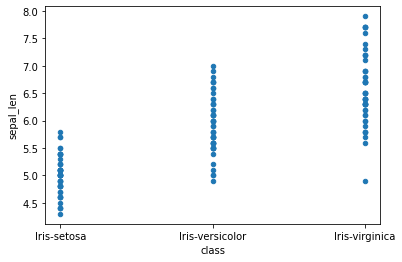

In [20]:
df.plot(kind="scatter", x="class", y="sepal_len")
plt.show()

## Challenge <a class="anchor" id="challenge"></a>

Use the Adult Data Set [Download](https://archive.ics.uci.edu/ml/datasets/Adult)

1. Create a Database and Model the Entities and Properties of Data
2. How many adults are Females?
3. What is the average of Age in Males?
4. How many is he capital-gain in Separated Females?
5. Plot a histogram showing the proportion of Workclass